In [1]:
#import libraries
import pandas as pd;
import geopandas as gpd;
import matplotlib.pyplot as plt;
%matplotlib notebook
import nu mpy as np; #Using numpy for regex
import pgeocode; #Used to convert postcodes to locations
from shapely.geometry import Point; # Shapely for converting latitude/longtitude to geometry
from shapely.geometry import shape
from shapely.geometry.polygon import Polygon

import geopy.distance
from geopy.geocoders import Nominatim
import json;



import traveltimepy as ttpy
import os
from datetime import datetime #for examples
#TODO: store credentials in an environment variable
os.environ["TRAVELTIME_ID"] = '466b4c75'
os.environ["TRAVELTIME_KEY"] = 'aa473fed8d8638f1b576305a7e1fc019'

pd.set_option('display.precision', 1)

In [13]:
zip
df = pd.read_excel(r'volumes.xlsx', sheet_name='Raw Exports', header=0)
df['PC_Area'] = df['CDPostCode'].str.extract(r'(^[a-zA-Z][a-zA-Z]?)')
df['PC_District'] = df['CDPostCode'].str.extract(r'([^\s]+)')
df

,JobType,Load,ColDel,CDPostCode,letterLetter,Unload,PC_Area,PC_District
0,Export,WAKEFIELD,SHIPLEY,BD17 7JR,BD17,WAKEFIELD,BD,BD17
1,Export,DONCASTER,BRADFORD BD4 7TT,BD4 7TT,BD4,WAKEFIELD,BD,BD4
2,Export,DONCASTER,BRADFORD BD4 7TT,BD4 7TT,BD4,WAKEFIELD,BD,BD4
3,Export,DONCASTER,BRADFORD BD4 7TT,BD4 7TT,BD4,WAKEFIELD,BD,BD4
4,Export,DONCASTER,BRADFORD BD4 7TT,BD4 7TT,BD4,WAKEFIELD,BD,BD4
...,...,...,...,...,...,...,...,...
2533,Export,DONCASTER,"WHITWELL, WORKSOP S80 3LJ",S80 3LJ,S80,DONCASTER,S,S80
2534,Export,DONCASTER,"WHITWELL, WORKSOP S80 3LJ",S80 3LJ,S80,DONCASTER,S,S80
2535,Export,DONCASTER,"CARLIN HOW, SALTBURN-BY-THE-SEA TS1",TS13 4EE,TS13,DONCASTER,TS,TS13
2536,Export,RELOAD,MIDDLESBROUGH TS2 1UT,TS2 1UT,TS2,DONCASTER,TS,TS2


In [3]:
#Set up Freightliner locations
data = [['Leeds', 53.7496, -1.5494], ['Doncaster', 53.497, -1.1821]]
  
# Create the pandas DataFrame
fl_locations = pd.DataFrame(data, columns=['Terminal', 'Lat', 'Long'])  

# print dataframe.
fl_locations

# creating a geometry column 
geometry = [Point(xy) for xy in zip(fl_locations['Long'], fl_locations['Lat'])]
# Coordinate reference system : WGS84
#crs = {'init': 'epsg:4326'}
crs = 'epsg:4326'
# Creating a Geographic data frame 
fl_points = gpd.GeoDataFrame(fl_locations, crs=crs, geometry=geometry)

indexed_fl_points = fl_points.set_index('Terminal')
fl_points

,Terminal,Lat,Long,geometry
0,Leeds,53.7,-1.5,POINT (-1.54940 53.74960)
1,Doncaster,53.5,-1.2,POINT (-1.18210 53.49700)


In [4]:
explore = df.groupby(["JobType", "Load"])["Unload"].count().reset_index()
explore

,JobType,Load,Unload
0,Export,CANNOCK,2
1,Export,DONCASTER,70
2,Export,HULL,4
3,Export,IMMINGHAM,224
4,Export,KEGWORTH,1
5,Export,LEEDS,1845
6,Export,LIFT ON CONTAINER,3
7,Export,LIVERPOOL,1
8,Export,NORMANTON,1
9,Export,PARIS RELOAD,7


In [5]:
#Inclusion & Exclusion Criteria
#TODO: Separate maps for Leeds and Doncaster

load_included = ['LEEDS']
Postcode_excluded = ['TESC', 'TS6 6UD', 'DL1 4PW']
slice = df[(df.Load.str.contains('|'.join(load_included))) & ~(df.CDPostCode.str.contains('|'.join(Postcode_excluded)))]
slice

,JobType,Load,ColDel,CDPostCode,letterLetter,Unload,PC_Area,PC_District
15,Export,LEEDS,BRADFORD,BD4 7TT,BD4,WAKEFIELD,BD,BD4
16,Export,LEEDS,BRADFORD,BD4 7TT,BD4,WAKEFIELD,BD,BD4
17,Export,LEEDS,BRADFORD,BD4 7TT,BD4,WAKEFIELD,BD,BD4
18,Export,LEEDS,BRADFORD BD4 7TT,BD4 7TT,BD4,WAKEFIELD,BD,BD4
19,Export,LEEDS,BRADFORD BD4 7TT,BD4 7TT,BD4,WAKEFIELD,BD,BD4
...,...,...,...,...,...,...,...,...
2525,Export,LEEDS,GAINSBOROUGH,DN21 3LF,DN21,DONCASTER,DN,DN21
2526,Export,LEEDS,GAINSBOROUGH,DN21 3LF,DN21,DONCASTER,DN,DN21
2527,Export,LEEDS,GAINSBOROUGH,DN21 3LF,DN21,DONCASTER,DN,DN21
2529,Export,LEEDS,SHERBURN IN ELMET,LS25 6JH,LS25,DONCASTER,LS,LS25


In [6]:
slice[slice['PC_District'] == 'DL1']

,JobType,Load,ColDel,CDPostCode,letterLetter,Unload,PC_Area,PC_District


# Postcode District Level Analysis (e.g., LN10)

<IPython.core.display.Javascript object>


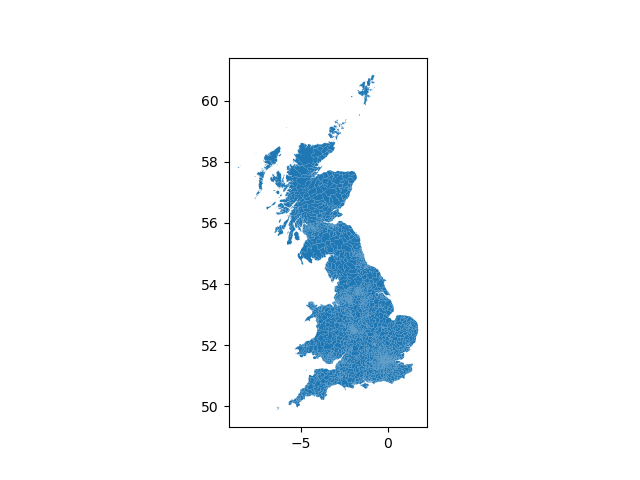

In [7]:
#Load and check map of PostCode Districts
fp = "postcodes/Districts.shp"
map_df = gpd.read_file(fp)
map_df.plot()

In [8]:
#Examine Header data of map
map_df.head()

,name,geometry
0,AB10,"POLYGON ((-2.11645 57.14656, -2.11655 57.14663..."
1,AB11,"MULTIPOLYGON (((-2.05257 57.13426, -2.05729 57..."
2,AB12,"MULTIPOLYGON (((-2.12807 57.03684, -2.12986 57..."
3,AB13,"POLYGON ((-2.26153 57.10694, -2.27015 57.11525..."
4,AB14,"POLYGON ((-2.26153 57.10694, -2.26315 57.10619..."


In [9]:
#Aggregate postcodes with total containers for the year
aggregate_district = slice.groupby(["PC_District"])['Unload'].count().reset_index()
sorted_area = aggregate_district.sort_values(by = "Unload", ascending = 0).head(20)
#sorted_area['Unit_pct'] = sorted_area.Unload / df.Unload.sum()
#sorted_area.style.format({
#    'Unit_pct': '{:,.1%}'.format,
#})
aggregate_district['PC_District'] = aggregate_district['PC_District'].str.upper() 

In [10]:
sorted_area

,PC_District,Unload
16,BD4,89
93,LS25,82
74,HX5,70
44,DN40,70
15,BD3,53
145,S80,44
152,TS2,40
181,YO42,33
56,HG4,33
69,HU9,32


In [11]:
reset_index = map_df.set_index("name")
merged = reset_index.join(aggregate_district.set_index("PC_District"))
merged["Unload"] = merged["Unload"].fillna(0)
merged

,geometry,Unload
name,,
AB10,"POLYGON ((-2.11645 57.14656, -2.11655 57.14663...",0.0
AB11,"MULTIPOLYGON (((-2.05257 57.13426, -2.05729 57...",0.0
AB12,"MULTIPOLYGON (((-2.12807 57.03684, -2.12986 57...",0.0
AB13,"POLYGON ((-2.26153 57.10694, -2.27015 57.11525...",0.0
AB14,"POLYGON ((-2.26153 57.10694, -2.26315 57.10619...",0.0
...,...,...
YO90,"MULTIPOLYGON (((-1.08958 53.95931, -1.08891 53...",0.0
YO91,"POLYGON ((-1.06530 53.97796, -1.06634 53.97830...",0.0
ZE1,"MULTIPOLYGON (((-1.17282 60.12108, -1.18797 60...",0.0


<IPython.core.display.Javascript object>


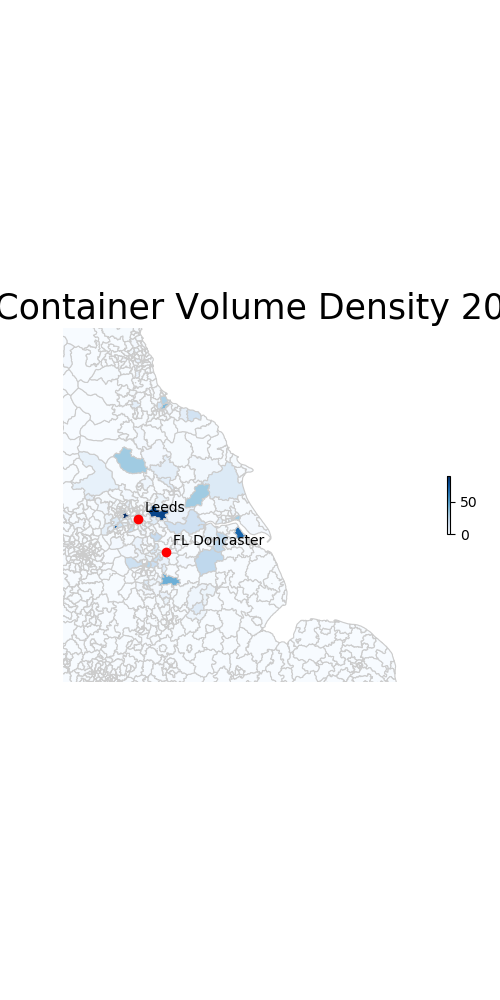

In [12]:
variable = "Unload"
vmin, vmax = 0, 90
fig, ax = plt.subplots(1, figsize=(5, 10))

# add a title and remove axis
ax.set_title("FL Container Volume Density 2022", fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.axis('off')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, fraction=0.0075, pad=0.04)


ax.annotate("Leeds", (indexed_fl_points.loc["Leeds"]["Long"], indexed_fl_points.loc["Leeds"]["Lat"]), xycoords='data', xytext=(5,5), textcoords="offset points")
ax.annotate("FL Doncaster", (indexed_fl_points.loc["Doncaster"]["Long"], indexed_fl_points.loc["Doncaster"]["Lat"]), xycoords='data', xytext=(5,5), textcoords="offset points")


merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
fl_points.plot(ax=ax, color="red")



In [19]:
travel_time = 59*60
time = "2022-10-12T09:00:00Z"

travel_time_data = []

for x in fl_points['Terminal']:
    search = {
      'id': x,
      'departure_time':  time,
      'travel_time': travel_time,
      'coords': {'lat': fl_points[fl_points['Terminal'].str.contains(x)]["Lat"].iloc[0], 'lng': fl_points[fl_points['Terminal'].str.contains(x)]["Long"].iloc[0]},
      'transportation': {'type': "driving"},
      'properties': ["travel_time_all"],
      "reachable_postcodes_threshold": 0.1
    }
    data = ttpy.time_filter_postcode_districts(departure_searches=search)
    travel_time_data.append(data)
    
travel_time_data

[{'results': [{'search_id': 'Leeds',
    'districts': [{'code': 'ls10',
      'properties': {'travel_time_all': {'min': 70,
        'max': 1036,
        'mean': 461,
        'median': 391}}},
     {'code': 'dn8',
      'properties': {'travel_time_all': {'min': 2436,
        'max': 2972,
        'mean': 2645,
        'median': 2654}}},
     {'code': 'yo8',
      'properties': {'travel_time_all': {'min': 2015,
        'max': 3505,
        'mean': 2656,
        'median': 2639}}},
     {'code': 'hx6',
      'properties': {'travel_time_all': {'min': 2199,
        'max': 2809,
        'mean': 2468,
        'median': 2441}}},
     {'code': 'm7',
      'properties': {'travel_time_all': {'min': 3001,
        'max': 3676,
        'mean': 3292,
        'median': 3288}}},
     {'code': 's66',
      'properties': {'travel_time_all': {'min': 2776,
        'max': 3451,
        'mean': 3138,
        'median': 3157}}},
     {'code': 'bl3',
      'properties': {'travel_time_all': {'min': 3229,
        '

In [20]:
df2 = aggregate_district

for search in travel_time_data:
    pcarea_tt = []
    mean_tt = []
    for pcarea in search.get('results')[0].get('districts'):
        pcarea_tt.append(pcarea.get('code').upper())
        mean_tt.append(pcarea.get('properties').get('travel_time_all').get('mean'))
    output_tt = pd.DataFrame(list(zip(pcarea_tt, mean_tt)),
               columns =['pc_area', 'mean_tt'])
    df2 = df2.merge(output_tt, left_on='PC_District', right_on='pc_area', how='left')
    df2['mean_tt'].fillna(100000, inplace=True)
    df2[search.get('results')[0].get('search_id')] = df2['mean_tt']
    df2.drop(columns=['pc_area', 'mean_tt'], inplace=True)
df2

,PC_District,Unload,Leeds,Doncaster
0,BB1,3,100000.0,100000.0
1,BB11,1,100000.0,100000.0
2,BB12,1,100000.0,100000.0
3,BB18,8,100000.0,100000.0
4,BB4,2,3743.0,100000.0
...,...,...,...,...
183,YO434BT,1,100000.0,100000.0
184,YO61,8,3699.0,100000.0
185,YO62,1,100000.0,100000.0
186,YO7,2,3529.0,3922.0


In [23]:
df3 = df2
bins = [0, 15*60, 30 * 60, 45*60, 60*60, 100000]
group_names = ['< 15m', '15-30m', '30-45m', '45-60m', '60m+']
df3['Leeds band'] = pd.cut(df2['Leeds'], bins, labels=group_names)
df3['Doncaster band'] = pd.cut(df2['Doncaster'], bins, labels=group_names)
df3

,PC_District,Unload,Leeds,Doncaster,Leeds band,Doncaster band
0,BB1,3,100000.0,100000.0,60m+,60m+
1,BB11,1,100000.0,100000.0,60m+,60m+
2,BB12,1,100000.0,100000.0,60m+,60m+
3,BB18,8,100000.0,100000.0,60m+,60m+
4,BB4,2,3743.0,100000.0,60m+,60m+
...,...,...,...,...,...,...
183,YO434BT,1,100000.0,100000.0,60m+,60m+
184,YO61,8,3699.0,100000.0,60m+,60m+
185,YO62,1,100000.0,100000.0,60m+,60m+
186,YO7,2,3529.0,3922.0,45-60m,60m+


In [27]:
df3.to_csv('travel_time_FRS.csv')

# Postcode Area-level analysis (e.g., LN)

<IPython.core.display.Javascript object>


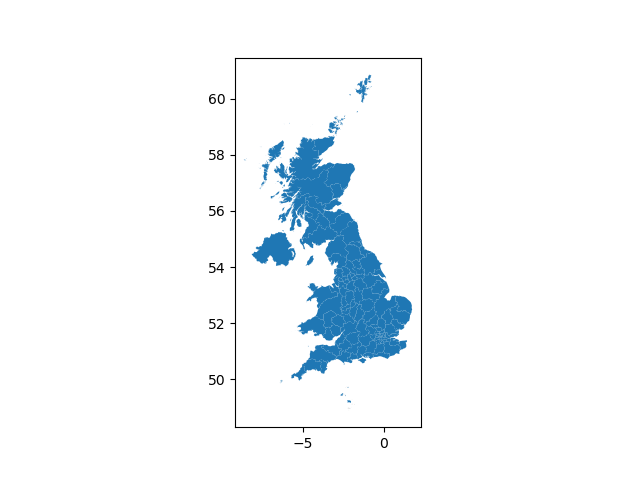

In [34]:
#Load and check map of PostCode Districts
fp_areas = "postcodes/Areas.shp"
map_df_areas = gpd.read_file(fp_areas)
map_df_areas.plot()

In [35]:
# Create Column with Postcode Area (one or two letters)
area_df = slice

In [36]:
#Aggregate postcodes with total containers for the year
aggregate_area = area_df.groupby(["PC_Area"])["Unload"].count().reset_index()
aggregate_area

,PC_Area,Unload
0,BB,15
1,BD,196
2,CA,4
3,DH,7
4,DL,12
5,DN,180
6,HD,26
7,HG,40
8,HS,2
9,HU,65


In [37]:
reset_index = map_df_areas.set_index("name")
merged_area = reset_index.join(aggregate_area.set_index("PC_Area"))
merged_area["Unload"] = merged_area["Unload"].fillna(0)
merged_area

,geometry,Unload
name,,
AB,"POLYGON ((-2.21091 56.88580, -2.21858 56.88676...",0.0
AL,"POLYGON ((-0.37138 51.68730, -0.37227 51.68781...",0.0
B,"POLYGON ((-2.05436 52.24756, -2.05530 52.25006...",0.0
BA,"POLYGON ((-2.08430 51.31717, -2.08008 51.31421...",0.0
BB,"POLYGON ((-2.21557 53.73160, -2.21541 53.73145...",15.0
...,...,...
ZE,"MULTIPOLYGON (((-0.80210 60.40932, -0.80233 60...",0.0
BT,"MULTIPOLYGON (((-5.54258 54.29000, -5.54922 54...",0.0
GY,"MULTIPOLYGON (((-2.36625 49.40170, -2.36750 49...",0.0


In [59]:
nomi = pgeocode.Nominatim('GB')
nomi.query_postal_code("S9 1")

postal_code                                S9
country_code                               GB
place_name        Tinsley, Darnall, Wincobank
state_name                            England
state_code                                ENG
county_name                   South Yorkshire
county_code                           2637273
community_name                            NaN
community_code                            NaN
latitude                              53.4099
longitude                            -1.40847
accuracy                                    4
Name: 0, dtype: object

<IPython.core.display.Javascript object>


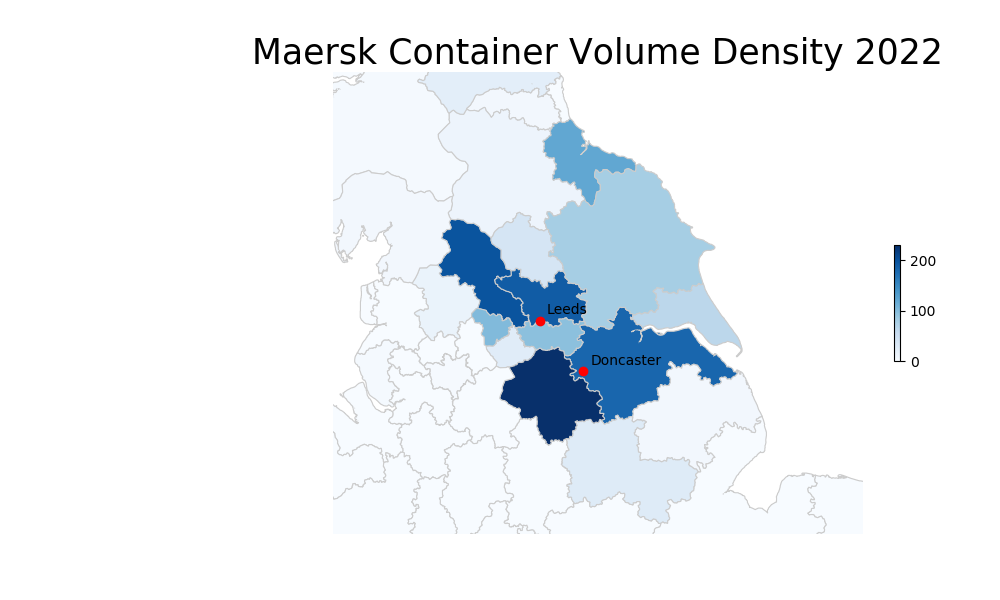

In [38]:
fig_com, ax_com = plt.subplots(1, figsize=(10, 6))
ax_com.axis('off')

vmin_area, vmax_area = 0, 230
# add a title
ax_com.set_title("Maersk Container Volume Density 2022", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin_area, vmax=vmax_area))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig_com.colorbar(sm, fraction=0.0075, pad=0.04)

ax_com.annotate("Leeds", (indexed_fl_points.loc["Leeds"]["Long"], indexed_fl_points.loc["Leeds"]["Lat"]), xycoords='data', xytext=(5,5), textcoords="offset points")
ax_com.annotate("Doncaster", (indexed_fl_points.loc["Doncaster"]["Long"], indexed_fl_points.loc["Doncaster"]["Lat"]), xycoords='data', xytext=(5,5), textcoords="offset points")

merged_area.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax_com, edgecolor='0.8') 
fl_points.plot(ax=ax_com, color="red")